# Day 9 (6/2/2022)

## Phase 0: Preparation

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import os 
import glob
import numpy as np

In [20]:
os.chdir("E:/Python/Sales_Data")

In [21]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [22]:
#combine all files in the list

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

In [ ]:
#export to csv

combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [3]:
#Import File

sales = pd.read_csv("E:/Python/Sales_Data/combined_csv.csv")
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Phase 1: Clean Data

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [5]:
sales.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [6]:
sales.dropna(inplace= True)

In [7]:
sales = sales[sales["Order ID"] != "Order ID"]

In [8]:
sales["Order ID"] = sales["Order ID"].astype("int64")

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/4271513267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Order ID"] = sales["Order ID"].astype("int64")


In [9]:
sales["Quantity Ordered"] = sales["Quantity Ordered"].astype("int64")

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/2153266313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Quantity Ordered"] = sales["Quantity Ordered"].astype("int64")


In [10]:
sales["Price Each"] = sales["Price Each"].astype("float64")

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/1770245417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Price Each"] = sales["Price Each"].astype("float64")


In [11]:
sales["Price Each"] = round(sales["Price Each"],0)

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/2865370700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Price Each"] = round(sales["Price Each"],0)


In [12]:
sales["Order Date"] = pd.to_datetime(sales["Order Date"])

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/954275791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Order Date"] = pd.to_datetime(sales["Order Date"])


## Phase 2: Analyze

### Q1: What was the best month for sales? How much was earned that month?

In [13]:
sales["Month Order"] = sales["Order Date"].dt.to_period("M")

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/1182994214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Month Order"] = sales["Order Date"].dt.to_period("M")


In [14]:
sales["Total Sales"] = sales["Quantity Ordered"] * sales["Price Each"]

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/1223028387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Total Sales"] = sales["Quantity Ordered"] * sales["Price Each"]


In [15]:
best_month_sales = sales.groupby(by = "Month Order")
best_month_sales = best_month_sales["Total Sales"].describe()
best_month_sales = pd.DataFrame(best_month_sales["count"])

In [16]:
best_month_sales.reset_index(inplace= True)
best_month_sales = best_month_sales.rename(columns= {"count":"Total Sales"})

In [17]:
best_month_sales.sort_values(by = "Total Sales", ascending= False)

,Month Order,Total Sales
11,2019-12,49968.0
9,2019-10,40564.0
3,2019-04,36558.0
10,2019-11,35146.0
4,2019-05,33132.0
2,2019-03,30306.0
6,2019-07,28586.0
5,2019-06,27108.0
1,2019-02,23950.0
7,2019-08,23922.0


=> 12/2019 has the most sales
Total Sales: 49968

Text(0.5, 1.0, 'Sales by Month')

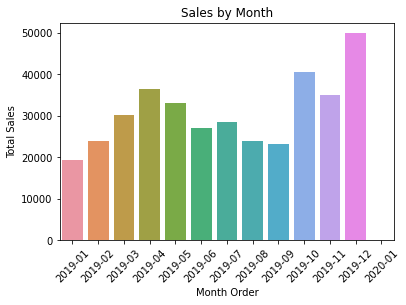

In [18]:
sb.barplot( x = "Month Order", y = "Total Sales", data = best_month_sales)
plt.xticks(rotation = 45)
plt.title(label = "Sales by Month")

### Q2: What city sold the most product?


In [19]:
sales.drop(columns=["Month Order","Total Sales"],inplace = True)
sales.head(10)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,12.0,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,100.0,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,12.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,12.0,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,12.0,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,100.0,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,12.0,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,12.0,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215"


In [20]:
sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,12.0,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,100.0,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,12.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,12.0,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [21]:
sales["City"] = sales["Purchase Address"].apply(lambda x: x.split(",")[1])

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/3143589289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["City"] = sales["Purchase Address"].apply(lambda x: x.split(",")[1])


In [22]:
best_city_order = sales.pivot_table(index= "City", values="Quantity Ordered", aggfunc= "sum")
best_city_order = pd.DataFrame(data = best_city_order)
best_city_order = best_city_order.reset_index()
best_city_order

,City,Quantity Ordered
0,Atlanta,33204
1,Austin,22306
2,Boston,45056
3,Dallas,33460
4,Los Angeles,66578
5,New York City,55864
6,Portland,28106
7,San Francisco,100478
8,Seattle,33106


Text(0.5, 1.0, 'Quantity Ordered by City')

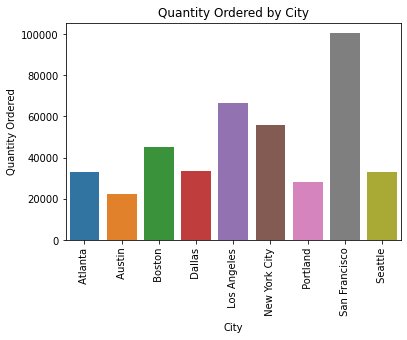

In [23]:
sb.barplot(x = "City", y = "Quantity Ordered", data = best_city_order)
plt.xticks(rotation = 90)
plt.title(label= "Quantity Ordered by City")

=> San Francisco the most with: 100478 orders

### Q3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [24]:
sales["Hour"] = sales["Order Date"].dt.hour

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/4140318840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Hour"] = sales["Order Date"].dt.hour


In [25]:
hour_order = pd.pivot_table(data = sales, values = "Quantity Ordered", index= "Hour", aggfunc= "sum")
hour_order = pd.DataFrame(data = hour_order)
hour_order = hour_order.reset_index()

In [26]:
hour_order

,Hour,Quantity Ordered
0,0,8856
1,1,5238
2,2,2796
3,3,1856
4,4,1874
5,5,2986
6,6,5620
7,7,9112
8,8,14004
9,9,19632


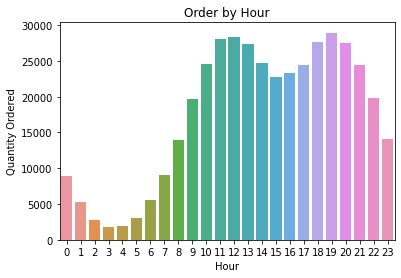

In [27]:
sb.barplot(x = "Hour", y = "Quantity Ordered", data = hour_order)
plt.title(label = "Order by Hour")
plt.show()

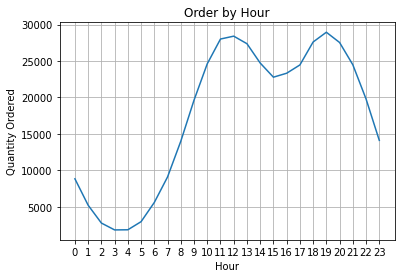

In [28]:
sb.lineplot(x = "Hour", y = "Quantity Ordered", data = hour_order)
plt.xticks(hour_order["Hour"])
plt.grid()
plt.title("Order by Hour")
plt.show()

Text(0.5, 1.0, 'Sales by Month')

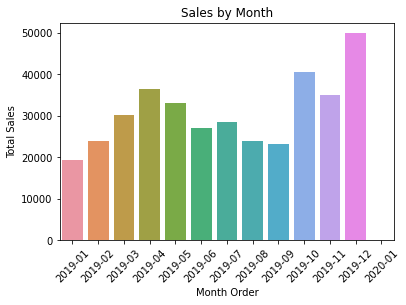

In [29]:
sb.barplot( x = "Month Order", y = "Total Sales", data = best_month_sales)
plt.xticks(rotation = 45)
plt.title(label = "Sales by Month")

In [30]:
sales["Month Order"] = sales["Order Date"].dt.to_period("M")

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/1182994214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["Month Order"] = sales["Order Date"].dt.to_period("M")


In [31]:
product_month = pd.pivot_table(data = sales,index = "Product", values = "Quantity Ordered", aggfunc= "count", columns= "Month Order")
product_month = product_month.drop(columns= "2020-01")
product_month = product_month.round(0)
product_month

Month Order,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
Product,,,,,,,,,,,,
20in Monitor,426.0,490.0,648.0,776.0,676.0,642.0,648.0,516.0,548.0,856.0,838.0,1134.0
27in 4K Gaming Monitor,624.0,850.0,956.0,1128.0,1082.0,902.0,966.0,876.0,760.0,1438.0,1150.0,1726.0
27in FHD Monitor,836.0,942.0,1212.0,1466.0,1376.0,1122.0,1206.0,970.0,960.0,1580.0,1420.0,1918.0
34in Ultrawide Monitor,626.0,832.0,1042.0,1302.0,1086.0,908.0,920.0,760.0,756.0,1340.0,1098.0,1692.0
AA Batteries (4-pack),2076.0,2552.0,3348.0,4126.0,3644.0,3086.0,3112.0,2714.0,2630.0,4482.0,3942.0,5442.0
AAA Batteries (4-pack),2162.0,2642.0,3294.0,3982.0,3784.0,2904.0,3116.0,2682.0,2564.0,4478.0,4006.0,5662.0
Apple Airpods Headphones,1618.0,2020.0,2626.0,3018.0,2708.0,2308.0,2424.0,1998.0,1930.0,3324.0,3004.0,4112.0
Bose SoundSport Headphones,1312.0,1662.0,2368.0,2558.0,2334.0,1946.0,2102.0,1744.0,1648.0,2880.0,2476.0,3614.0
Flatscreen TV,486.0,624.0,718.0,918.0,798.0,732.0,792.0,662.0,582.0,1046.0,914.0,1326.0


In [32]:
product_month["2019-12"].sort_values(ascending= False)

Product
USB-C Charging Cable          5960.0
Lightning Charging Cable      5786.0
AAA Batteries (4-pack)        5662.0
AA Batteries (4-pack)         5442.0
Wired Headphones              5092.0
Apple Airpods Headphones      4112.0
Bose SoundSport Headphones    3614.0
27in FHD Monitor              1918.0
iPhone                        1812.0
27in 4K Gaming Monitor        1726.0
34in Ultrawide Monitor        1692.0
Google Phone                  1428.0
Flatscreen TV                 1326.0
Macbook Pro Laptop            1286.0
20in Monitor                  1134.0
ThinkPad Laptop               1078.0
Vareebadd Phone                568.0
LG Dryer                       172.0
LG Washing Machine             160.0
Name: 2019-12, dtype: float64

Conclusion
In 2019: AAA Batteries (4-pack) had the highest sales: 62034
Q4(10 - 12/2019): the sales was witnessed the highest figure in all of months exmanined
Particularly:
    10: USB-C Charging Cable and Lightning Charging Cable: 4884
    11: USB-C Charging Cable: 4124
    12: USB-C Charging Cable: 5960
Recommendation: Maximize advertisements for USB-C and Charging Cable

### Q4: What product sold the most? Why do you think it sold the most?

In [34]:
sales.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Hour,Month Order
0,176558,USB-C Charging Cable,2,12.0,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,8,2019-04
2,176559,Bose SoundSport Headphones,1,100.0,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,22,2019-04
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14,2019-04
4,176560,Wired Headphones,1,12.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14,2019-04
5,176561,Wired Headphones,1,12.0,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,9,2019-04


In [37]:
price_product = pd.pivot_table(data = sales, values = "Price Each", index = "Product",aggfunc= "mean")
price_product = pd.DataFrame(data = price_product).reset_index()
price_product

,Product,Price Each
0,20in Monitor,110.0
1,27in 4K Gaming Monitor,390.0
2,27in FHD Monitor,150.0
3,34in Ultrawide Monitor,380.0
4,AA Batteries (4-pack),4.0
5,AAA Batteries (4-pack),3.0
6,Apple Airpods Headphones,150.0
7,Bose SoundSport Headphones,100.0
8,Flatscreen TV,300.0
9,Google Phone,600.0


In [40]:
most_product_order = pd.pivot_table(data = sales, values = "Quantity Ordered", index = "Product",aggfunc= "sum")
most_product_order.sort_values(by = "Quantity Ordered", ascending= False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),62034
AA Batteries (4-pack),55270
USB-C Charging Cable,47950
Lightning Charging Cable,46434
Wired Headphones,41114
Apple Airpods Headphones,31322
Bose SoundSport Headphones,26914
27in FHD Monitor,15100
iPhone,13698


In [50]:
most_product_order = pd.DataFrame(most_product_order)
most_product_order = most_product_order.reset_index()
most_product_order

,index,Product,Quantity Ordered
0,0,20in Monitor,8258
1,1,27in 4K Gaming Monitor,12488
2,2,27in FHD Monitor,15100
3,3,34in Ultrawide Monitor,12398
4,4,AA Batteries (4-pack),55270
5,5,AAA Batteries (4-pack),62034
6,6,Apple Airpods Headphones,31322
7,7,Bose SoundSport Headphones,26914
8,8,Flatscreen TV,9638
9,9,Google Phone,11064


In [56]:
most_product_order.drop(columns= "index", inplace= True)

In [58]:
most_product_order = most_product_order.sort_values(by= "Product",ascending= True)
most_product_order

,Product,Quantity Ordered
0,20in Monitor,8258
1,27in 4K Gaming Monitor,12488
2,27in FHD Monitor,15100
3,34in Ultrawide Monitor,12398
4,AA Batteries (4-pack),55270
5,AAA Batteries (4-pack),62034
6,Apple Airpods Headphones,31322
7,Bose SoundSport Headphones,26914
8,Flatscreen TV,9638
9,Google Phone,11064


In [59]:
most_product_order["Price"] = price_product["Price Each"]
most_product_order

,Product,Quantity Ordered,Price
0,20in Monitor,8258,110.0
1,27in 4K Gaming Monitor,12488,390.0
2,27in FHD Monitor,15100,150.0
3,34in Ultrawide Monitor,12398,380.0
4,AA Batteries (4-pack),55270,4.0
5,AAA Batteries (4-pack),62034,3.0
6,Apple Airpods Headphones,31322,150.0
7,Bose SoundSport Headphones,26914,100.0
8,Flatscreen TV,9638,300.0
9,Google Phone,11064,600.0


Text(0.5, 1.0, 'Price and Quantity by Product')

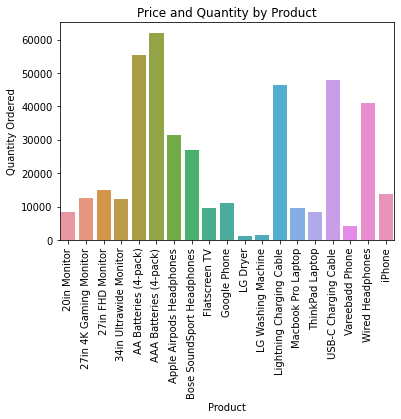

In [55]:
sb.barplot(x = "Product", y = "Quantity Ordered", data = most_product_order)
plt.xticks(rotation = 90)
plt.title(label= "Price and Quantity by Product")

C:\Users\DELL\AppData\Local\Temp/ipykernel_3648/62375880.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(most_product_order["Product"], rotation = 90)


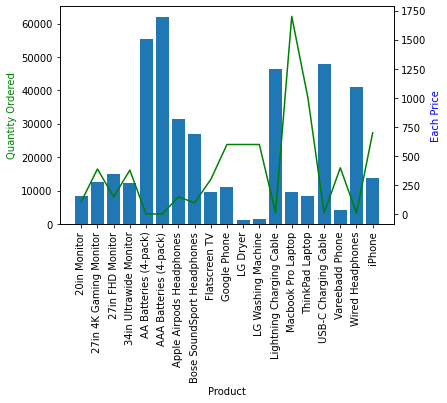

In [79]:
ax1 = plt.subplot()
ax2 = ax1.twinx()

ax1.bar(most_product_order["Product"], most_product_order["Quantity Ordered"])
ax2.plot(most_product_order["Product"], most_product_order["Price"], 'g-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Each Price', color='b')
ax1.set_xticklabels(most_product_order["Product"], rotation = 90)
plt.show()